Here I prepare data for future analysis

1. convert to proper format
2. clean data etc.


# convert txt to csv

In [2]:
import pandas as pd

# input file 
input_file = "Zsim.txt"
output_file = "Zsim.csv"

# Read the text file (adjust delimiter if needed)
#>>> df = pd.read_csv(input_file, delimiter="\t")  # Change "\t" to "," or " " if needed

# Save as CSV
#>> df.to_csv(output_file, index=False)

# creat 3 column csv file
'Frequency (Hz)', 'Z_real (Ohm)', 'Z_imag (Ohm)'

In [3]:
# Load the CSV file
#>> df = pd.read_csv('Zsim.csv')

# Select the columns you want to keep
#>> df_cleaned = df[['freq/Hz', 'Re(Z)/Ohm', '-Im(Z)/Ohm']]

# Rename columns for clarity
#>> df_cleaned.columns = ['Frequency (Hz)', 'Z_real (Ohm)', 'Z_imag (Ohm)']

# Save the cleaned data (optional)
#>> df_cleaned.to_csv('Zsim_3.csv', index=False, header=False)

# Display the cleaned data (optional)
#>> print(df_cleaned.head())

Plot Data

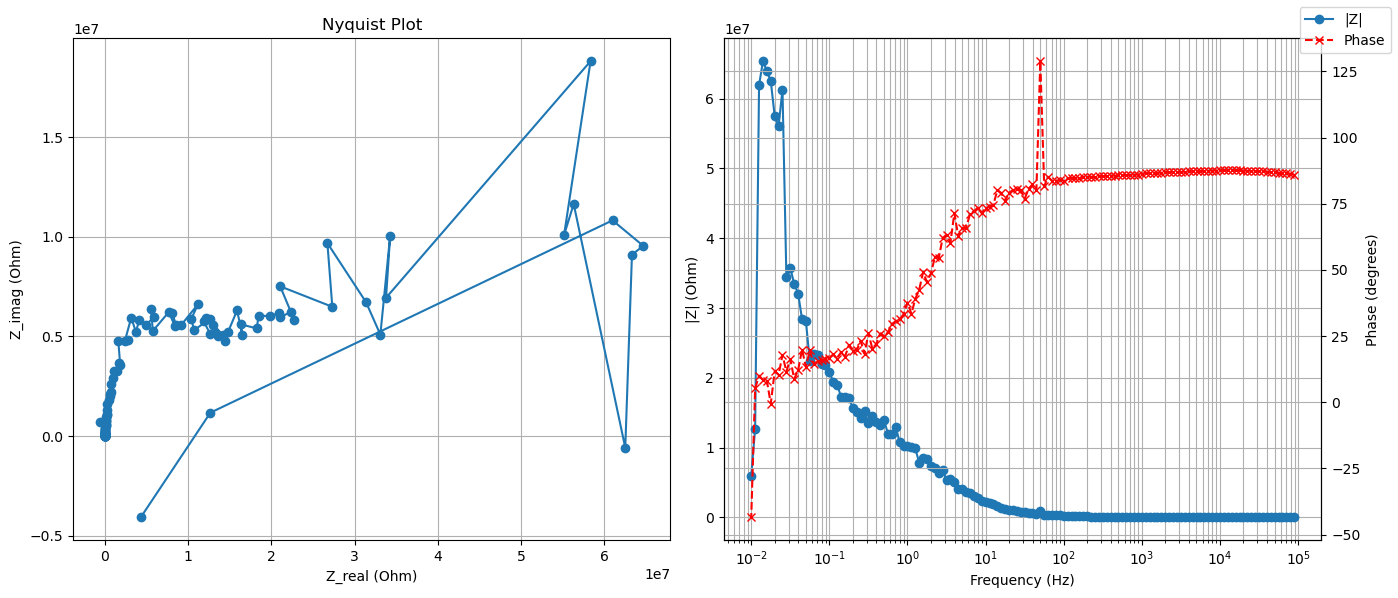

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df = pd.read_csv('YSZ_Si_T290ohm_C01_3.csv')

# assign column names
df.columns = ['Frequency (Hz)', 'Z_real (Ohm)', 'Z_imag (Ohm)']

# Calculate |Z| (impedance magnitude) and phase
df['|Z| (Ohm)'] = np.sqrt(df['Z_real (Ohm)']**2 + df['Z_imag (Ohm)']**2)
df['Phase (degrees)'] = np.degrees(np.arctan2(df['Z_imag (Ohm)'], df['Z_real (Ohm)']))

# Create the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Nyquist plot (Z_real vs Z_imag)
ax1.plot(df['Z_real (Ohm)'], df['Z_imag (Ohm)'], 'o-')
ax1.set_xlabel('Z_real (Ohm)')
ax1.set_ylabel('Z_imag (Ohm)')
ax1.set_title('Nyquist Plot')
ax1.grid()

# Bode plot (|Z| vs Frequency and Phase vs Frequency)
ax2.plot(df['Frequency (Hz)'], df['|Z| (Ohm)'], 'o-', label='|Z|')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('|Z| (Ohm)')
ax2.set_xscale('log')
ax2.grid(which='both', axis='both')

ax3 = ax2.twinx()
ax3.plot(df['Frequency (Hz)'], df['Phase (degrees)'], 'x--', color='r', label='Phase')
ax3.set_ylabel('Phase (degrees)')
ax3.grid(which='both', axis='both')

fig.legend(loc='upper right')

plt.tight_layout()
plt.show()



# clean data

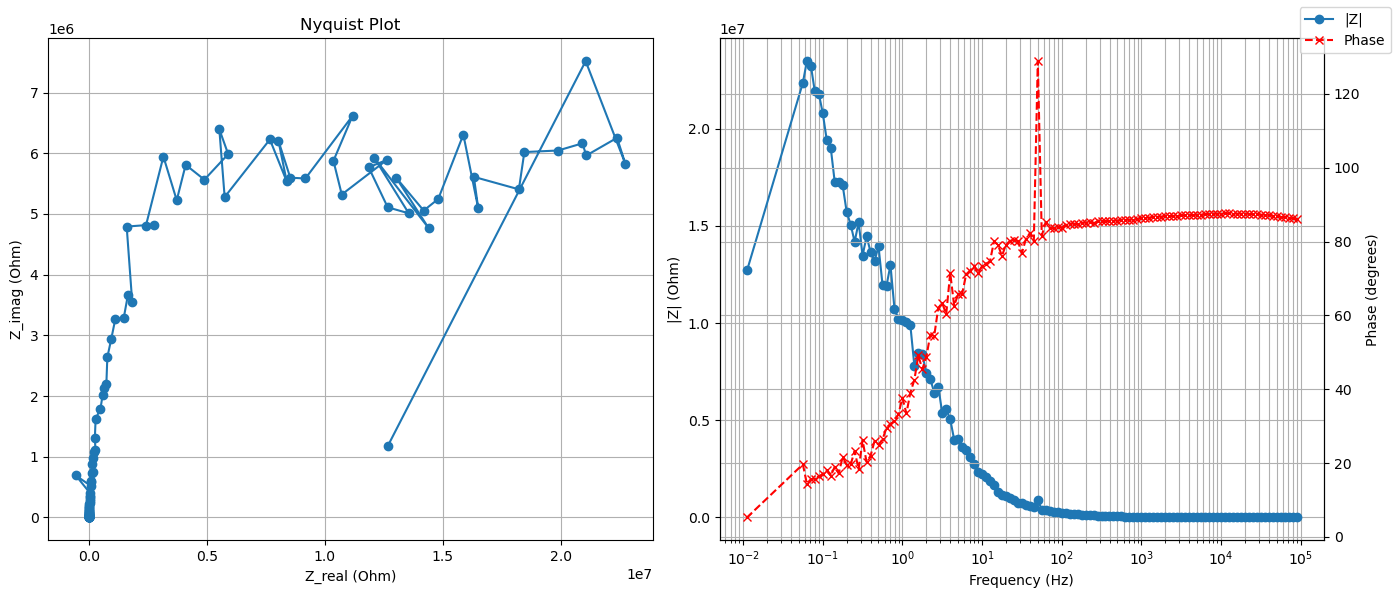

In [5]:
import pandas as pd

# Create the new DataFrame with the desired filter
#1 
# keep only positive Z_imag (Ohm)
df_f = df[df['Z_imag (Ohm)'] > 0]
#2
# remove higher Z_real values
df_f = df_f[df_f['Z_real (Ohm)'] <= 2.49e7]   #

# Create the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))


# Nyquist plot (Z_real vs Z_imag)
ax1.plot(df_f['Z_real (Ohm)'], df_f['Z_imag (Ohm)'], 'o-')
ax1.set_xlabel('Z_real (Ohm)')
ax1.set_ylabel('Z_imag (Ohm)')
ax1.set_title('Nyquist Plot')
ax1.grid()

# Bode plot (|Z| vs Frequency and Phase vs Frequency)
ax2.plot(df_f['Frequency (Hz)'], df_f['|Z| (Ohm)'], 'o-', label='|Z|')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('|Z| (Ohm)')
ax2.set_xscale('log')
ax2.grid(which='both', axis='both')

ax3 = ax2.twinx()
ax3.plot(df_f['Frequency (Hz)'], df_f['Phase (degrees)'], 'x--', color='r', label='Phase')
ax3.set_ylabel('Phase (degrees)')
ax3.grid(which='both', axis='both')

fig.legend(loc='upper right')

plt.tight_layout()
plt.show()


## Interactive PLot



In [6]:
import pandas as pd
import plotly.graph_objects as go


# Create the Nyquist plot (Z_real vs Z_imag) with interactive hover text
fig1 = go.Figure()
fig1.add_trace(go.Scatter(
    x=df_f['Z_real (Ohm)'],
    y=df_f['Z_imag (Ohm)'],
    mode='markers',
    text=df_f.index,  # Display the index on hover
    hovertemplate='Index: %{text}<br>Z_real: %{x}<br>Z_imag: %{y}<extra></extra>',
    name='Nyquist Plot'
))

fig1.update_layout(
    title='Nyquist Plot (Interactive)',
    xaxis_title='Z_real (Ohm)',
    yaxis_title='Z_imag (Ohm)',
    hovermode='closest'
)


# Create the Bode plot with interactive hover text
fig2 = go.Figure()

# |Z| vs Frequency
fig2.add_trace(go.Scatter(
    x=df_f['Frequency (Hz)'],
    y=df_f['|Z| (Ohm)'],
    mode='lines+markers',
    text=df_f.index,  # Display the index on hover
    hovertemplate='Index: %{text}<br>Frequency: %{x}<br>|Z|: %{y}<extra></extra>',
    name='|Z|'
))

# Phase vs Frequency
fig2.add_trace(go.Scatter(
    x=df_f['Frequency (Hz)'],
    y=df_f['Phase (degrees)'],
    mode='lines+markers',
    text=df_f.index,  # Display the index on hover
    hovertemplate='Index: %{text}<br>Frequency: %{x}<br>Phase: %{y}<extra></extra>',
    name='Phase',
    yaxis='y2'
))

fig2.update_layout(
    title='Bode Plot (Interactive)',
    xaxis_title='Frequency (Hz)',
    yaxis_title='|Z| (Ohm)',
    yaxis2=dict(title='Phase (degrees)', overlaying='y', side='right'),
    hovermode='closest',
    xaxis_type='log'
)

# Show the plots
fig1.show()
fig2.show()


## Remove 'Bad Data Points' by Index

In [7]:

# Specify the indices of the data points you want to remove
indices_to_remove = [65,138]  # Example indices

# Create a new DataFrame without the specified data points
df_f = df_f.drop(indices_to_remove).reset_index(drop=True)

In [8]:
# Create the Nyquist plot (Z_real vs Z_imag) with interactive hover text
fig1 = go.Figure()
fig1.add_trace(go.Scatter(
    x=df_f['Z_real (Ohm)'],
    y=df_f['Z_imag (Ohm)'],
    mode='markers',
    text=df_f.index,  # Display the index on hover
    hovertemplate='Index: %{text}<br>Z_real: %{x}<br>Z_imag: %{y}<extra></extra>',
    name='Nyquist Plot'
))

fig1.update_layout(
    title='Nyquist Plot (Interactive)',
    xaxis_title='Z_real (Ohm)',
    yaxis_title='Z_imag (Ohm)',
    hovermode='closest'
)


# Create the Bode plot with interactive hover text
fig2 = go.Figure()

# |Z| vs Frequency
fig2.add_trace(go.Scatter(
    x=df_f['Frequency (Hz)'],
    y=df_f['|Z| (Ohm)'],
    mode='lines+markers',
    text=df_f.index,  # Display the index on hover
    hovertemplate='Index: %{text}<br>Frequency: %{x}<br>|Z|: %{y}<extra></extra>',
    name='|Z|'
))

# Phase vs Frequency
fig2.add_trace(go.Scatter(
    x=df_f['Frequency (Hz)'],
    y=df_f['Phase (degrees)'],
    mode='lines+markers',
    text=df_f.index,  # Display the index on hover
    hovertemplate='Index: %{text}<br>Frequency: %{x}<br>Phase: %{y}<extra></extra>',
    name='Phase',
    yaxis='y2'
))

fig2.update_layout(
    title='Bode Plot (Interactive)',
    xaxis_title='Frequency (Hz)',
    yaxis_title='|Z| (Ohm)',
    yaxis2=dict(title='Phase (degrees)', overlaying='y', side='right'),
    hovermode='closest',
    xaxis_type='log'
)

# Show the plots
fig1.show()
fig2.show()

### after Cleaning

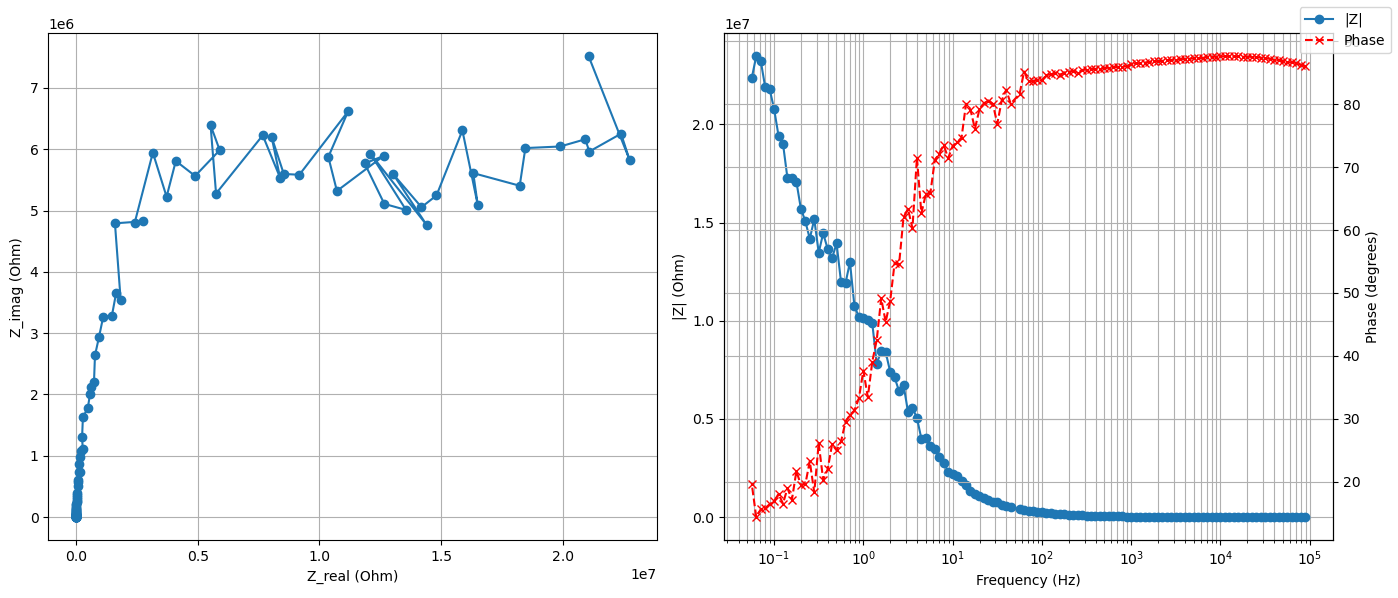

In [14]:
# Create the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))


# Nyquist plot (Z_real vs Z_imag)
ax1.plot(df_f['Z_real (Ohm)'], df_f['Z_imag (Ohm)'], 'o-')
ax1.set_xlabel('Z_real (Ohm)')
ax1.set_ylabel('Z_imag (Ohm)')
#ax1.set_title('Nyquist Plot')
ax1.grid()

# Bode plot (|Z| vs Frequency and Phase vs Frequency)
ax2.plot(df_f['Frequency (Hz)'], df_f['|Z| (Ohm)'], 'o-', label='|Z|')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('|Z| (Ohm)')
ax2.set_xscale('log')
ax2.grid(which='both', axis='both')

ax3 = ax2.twinx()
ax3.plot(df_f['Frequency (Hz)'], df_f['Phase (degrees)'], 'x--', color='r', label='Phase')
ax3.set_ylabel('Phase (degrees)')
ax3.grid(which='both', axis='both')

fig.legend(loc='upper right')

plt.tight_layout()
plt.show()


# creat new data file

In [10]:
# convert back to 3 columnar data file

# Select the columns you want to keep
df_cleaned = df_f[['Frequency (Hz)', 'Z_real (Ohm)', 'Z_imag (Ohm)']]

# Rename columns for clarity
df_cleaned.columns = ['Frequency (Hz)', 'Z_real (Ohm)', 'Z_imag (Ohm)']

# Create a CSV file without the header
filtered_data = 'YSZ_Si_T290ohm_C01_3c.csv'
df_cleaned.to_csv(filtered_data, header=False, index=False)



In [11]:
df_cleaned.head()

,Frequency (Hz),Z_real (Ohm),Z_imag (Ohm)
0,89129.305,23.248297,332.71616
1,79433.273,24.322168,372.34995
2,70794.984,25.551113,416.87479
3,63093.828,27.433758,467.17279
4,56237.012,30.416710,523.19403


In [12]:
df

,Frequency (Hz),Z_real (Ohm),Z_imag (Ohm),|Z| (Ohm),Phase (degrees)
0,89129.305000,2.324830e+01,3.327162e+02,3.335274e+02,86.002996
1,79433.273000,2.432217e+01,3.723499e+02,3.731435e+02,86.262708
2,70794.984000,2.555111e+01,4.168748e+02,4.176571e+02,86.492612
3,63093.828000,2.743376e+01,4.671728e+02,4.679776e+02,86.639283
4,56237.012000,3.041671e+01,5.231940e+02,5.240774e+02,86.672765
...,...,...,...,...,...
135,0.015842,6.331902e+07,9.106579e+06,6.397053e+07,8.184193
136,0.014127,6.468012e+07,9.548914e+06,6.538119e+07,8.398079
137,0.012592,6.098882e+07,1.083090e+07,6.194307e+07,10.070072
138,0.011220,1.266473e+07,1.171793e+06,1.271882e+07,5.286191
